In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import missingno as msno

In [4]:
data = pd.read_csv('donnee_brief.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.shape

(1338, 7)

Nettoyage des données.

In [6]:
#Etude du type des variables
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
#On observe le type des objets étudiés
print(type(data['sex'][0]))
print(type(data['smoker'][0]))
print(type(data['region'][0]))

<class 'str'>
<class 'str'>
<class 'str'>


On va regarder les elements des variables 'sex', 'smoker' et 'region' .

In [8]:
data['sex'].unique()
#Il n'y a que deux modalités male et female, il ne semble pas y avoir de valeurs atypiques

array(['female', 'male'], dtype=object)

In [9]:
data['smoker'].unique()
#Il n'y a que deux modlités yes et no , il ne semble pas y avoir de valeur atypiques

array(['yes', 'no'], dtype=object)

In [10]:
data['region'].unique()
#Il y a 4 modalités/possibilités southwest , southeast , northwest et northeast , il ne semble pas y avoir de valeurs atypiques.

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

On vérifie si il y a des valeurs manquantes.

In [11]:
data.isnull().sum()
#Il n'y a pas de valeurs nulles.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot: >

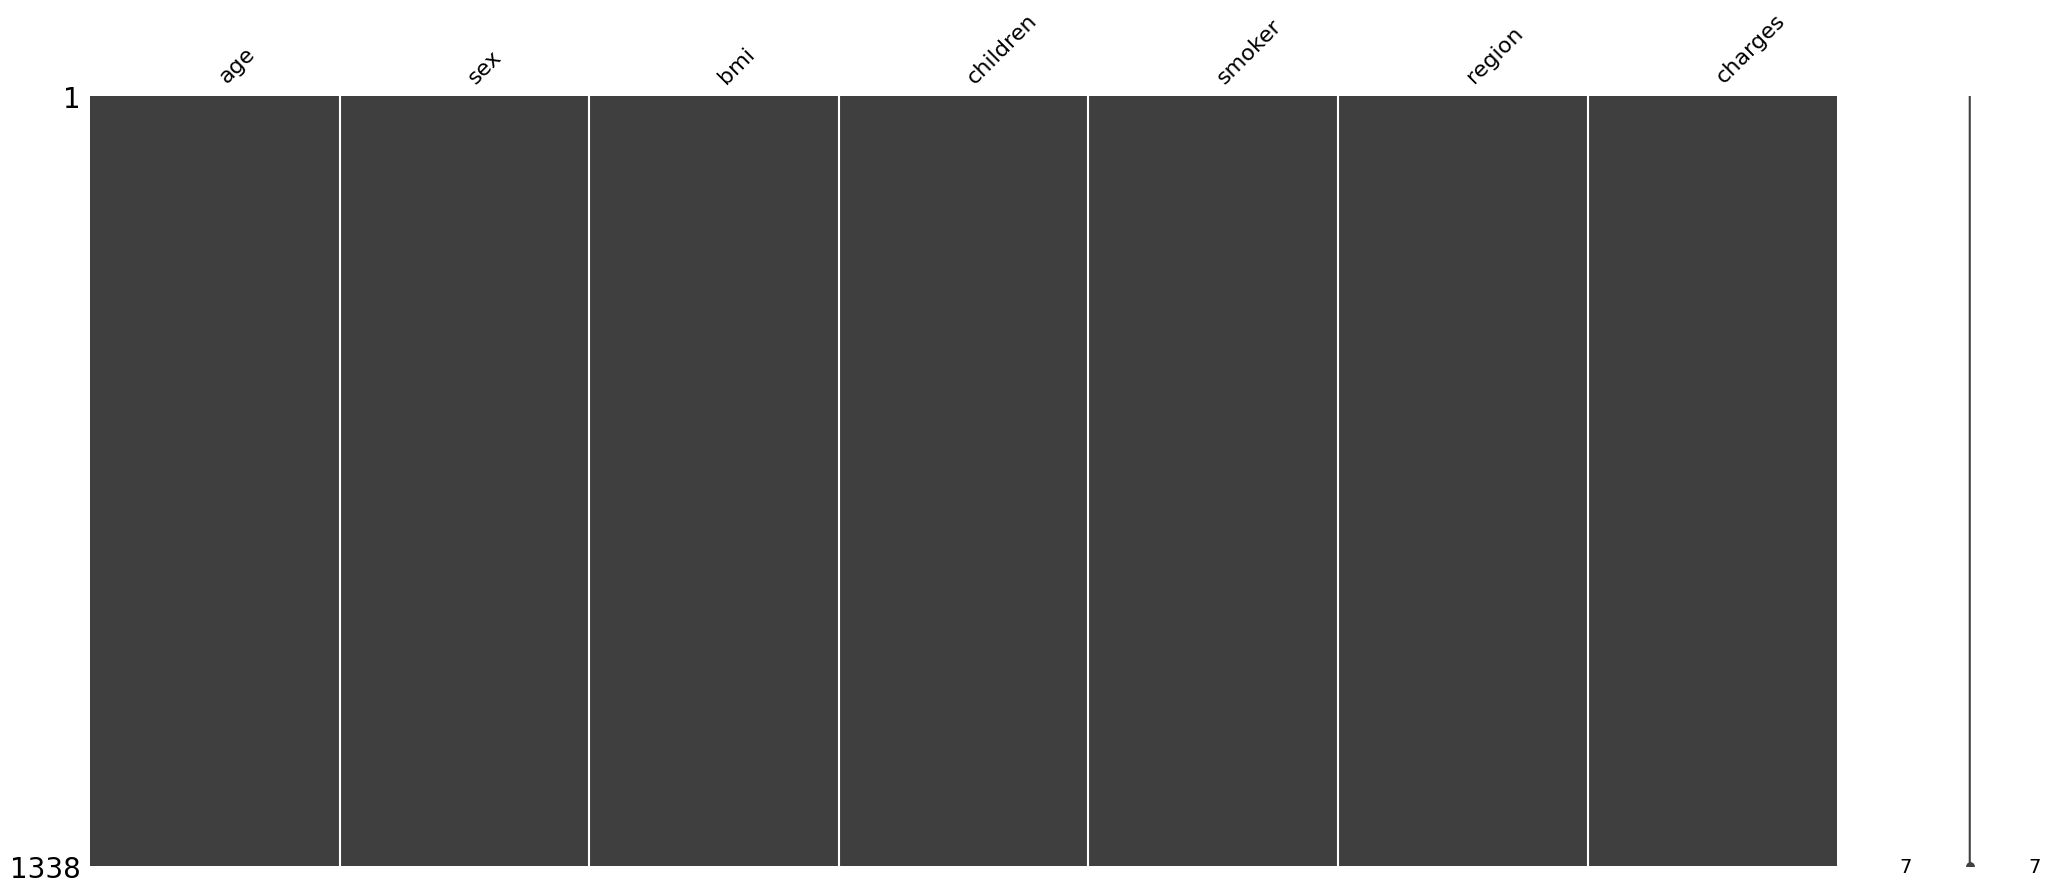

In [12]:
msno.matrix(data)

In [13]:
# pour afficher uniquement les variables qui ont des valeurs manquantes ( un filtre qui peut être utile)
nb_na = data.isnull().sum()
nb_na[nb_na>0]

Series([], dtype: int64)

Voyons si il y a des doublons.

In [14]:
data.duplicated().nunique()
#Il semblerait qu'il y en ai deux,soit un seul élement mis deux fois.

2

In [15]:
data.loc[data.duplicated(keep='first'),:]
#On recherche l'element en double.

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [16]:
data.loc[data.duplicated(keep=False),:]
#On recherche les element en double, et on vérifie si leur index 
# est proche pour valider si cela est une erreur humaine

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


Il n' y a pas d'anomalies , donc on peut conserver les valeurs car il n'est pas impossible d'avoir 2 personnes similaires, et ce n'est pas une erreur car il y a une grande différence entre les index.

In [17]:
#Si on veut supprimer les doublons.
#data.drop_duplicates()

On vérifie s'il y a des valeurs aberrantes.

In [18]:
data.describe()
#On récupère les infos des colonnes à données quantitatives.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot: >

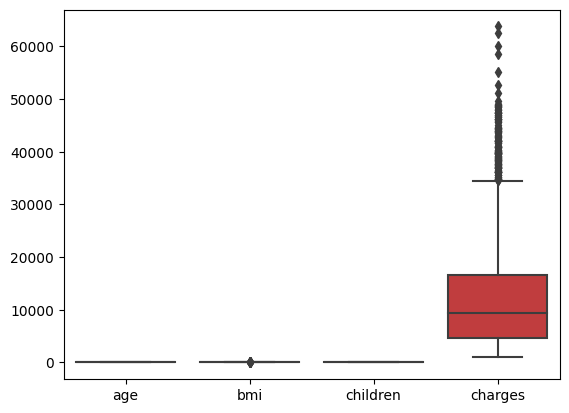

In [19]:
sns.boxplot(data)
#On remarque qu'il y a de nombreux outliers en charges

On modifie les éléments de notre datasets pour pouvoir visualiser les données.

In [20]:
data['sex']=data['sex'].replace({'male':1,'female' :2})

In [21]:
data['smoker']=data['smoker'].replace({'yes':1,'no' :2})

In [22]:
data = pd.get_dummies(data, columns=['region'], drop_first=True)
data

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,2,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,2,1725.55230,0,1,0
2,28,1,33.000,3,2,4449.46200,0,1,0
3,33,1,22.705,0,2,21984.47061,1,0,0
4,32,1,28.880,0,2,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,2,10600.54830,1,0,0
1334,18,2,31.920,0,2,2205.98080,0,0,0
1335,18,2,36.850,0,2,1629.83350,0,1,0
1336,21,2,25.800,0,2,2007.94500,0,0,1


<AxesSubplot: >

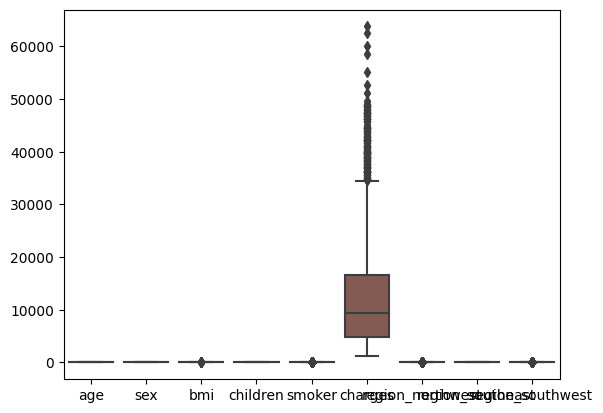

In [23]:
sns.boxplot(data)

<AxesSubplot: >

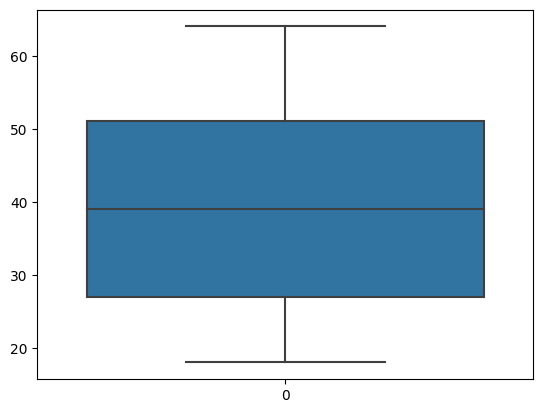

In [24]:
sns.boxplot(data["age"])

<AxesSubplot: >

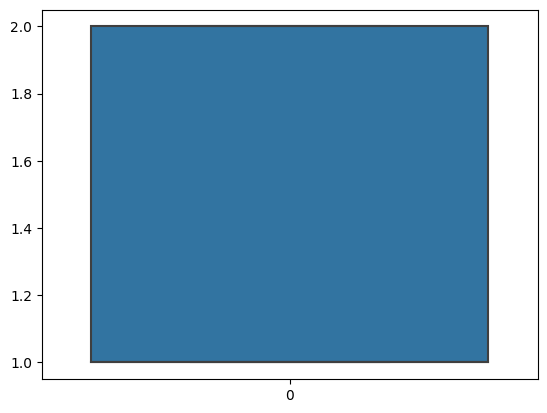

In [25]:
sns.boxplot(data["sex"])

<AxesSubplot: >

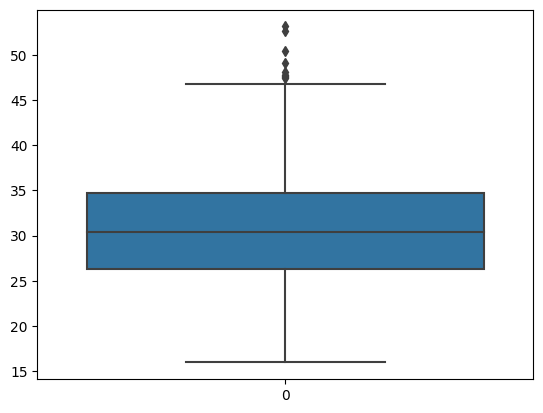

In [26]:
sns.boxplot(data['bmi'])

<AxesSubplot: >

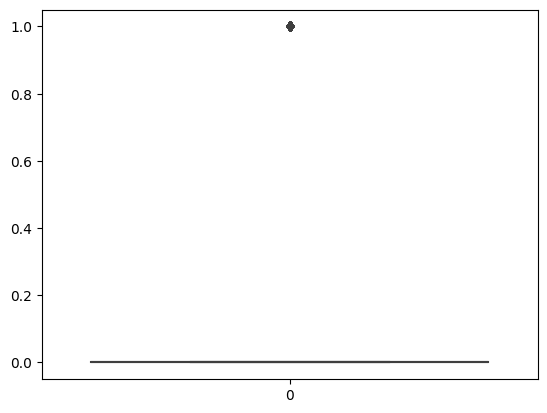

In [27]:
sns.boxplot(data['region_northwest'])

<AxesSubplot: >

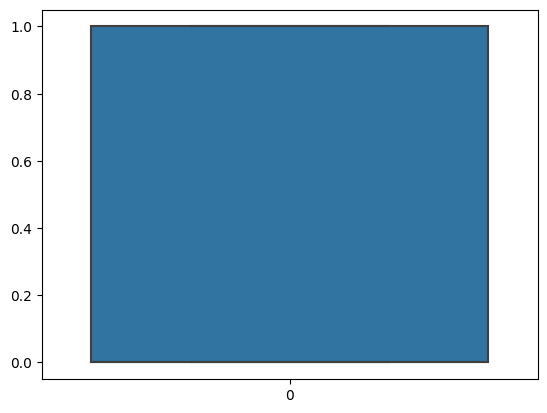

In [28]:
sns.boxplot(data['region_southeast'])

<AxesSubplot: >

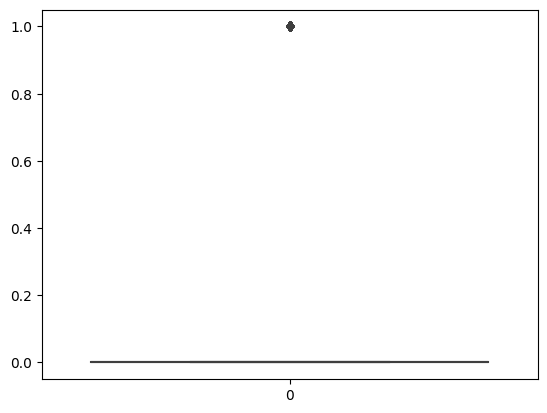

In [29]:
sns.boxplot(data['region_southwest'])

<AxesSubplot: >

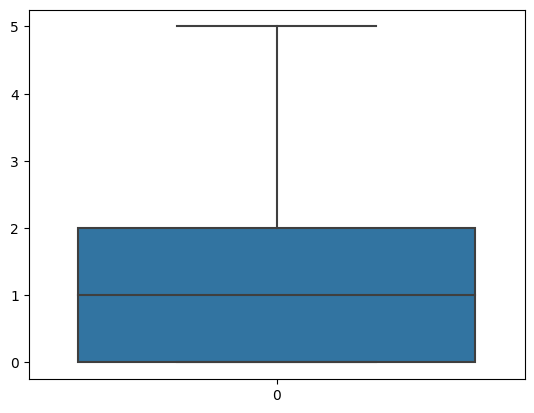

In [30]:
sns.boxplot(data["children"])

<AxesSubplot: >

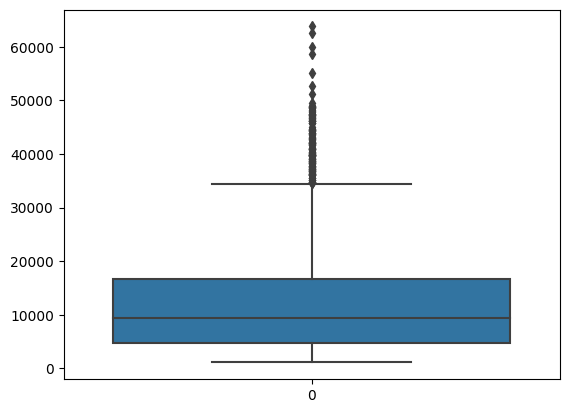

In [31]:
sns.boxplot(data["charges"])
#Il y a de nombreuses valeurs outliers/extême

On interprète le BMI de cette manière.
Entre 18,5 et 25, on estime que vous êtes dans une fourchette de poids « normal ». En dessous de 18,5, on parle de maigreur. Au-dessus de 25, on parle de surpoids, au-delà de 30, d’obésité et au-dessus de 40, d’obésité morbide.
Il y a des personnes à risques et atypiques, mais aucune valeur aberrante.

On interprète maintenant l'âge.
Il n'y a pas d'assurant avant 18 ans , ce qui est logique ccar ils ne sont pas encore majeurs,et le plus vieux est de 64 ans,ce qui est normal.

On interprète le nombre d'enfants.Il est entre 0 et 5 , ce qui est logique.

On interprète enfin les charges.Elles sont comprise entre 1121.873900 $ et 63770.428010 $, ce qui ne semblent pas abberant sans plus de contexte.


In [32]:
data.nlargest(5, ['age'])
#On récupère les 5 personnes les plus agées, si on veut récupérer plus d'informations.

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
62,64,1,24.70,1,2,30166.61817,1,0,0
94,64,2,31.30,2,1,47291.05500,0,0,1
199,64,2,39.33,0,2,14901.51670,0,0,0
328,64,2,33.80,1,1,47928.03000,0,0,1
335,64,1,34.50,0,2,13822.80300,0,0,1


In [33]:
data['region_northwest']=data['region_northwest'].replace({1:1,0 :2})
data['region_southeast']=data['region_southeast'].replace({1:1,0 :2})
data['region_southwest']=data['region_southwest'].replace({1:1,0 :2})
data

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,2,27.900,0,1,16884.92400,2,2,1
1,18,1,33.770,1,2,1725.55230,2,1,2
2,28,1,33.000,3,2,4449.46200,2,1,2
3,33,1,22.705,0,2,21984.47061,1,2,2
4,32,1,28.880,0,2,3866.85520,1,2,2
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,2,10600.54830,1,2,2
1334,18,2,31.920,0,2,2205.98080,2,2,2
1335,18,2,36.850,0,2,1629.83350,2,1,2
1336,21,2,25.800,0,2,2007.94500,2,2,1


In [34]:
data.describe()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,1.494768,30.663397,1.094918,1.795217,13270.422265,1.757100,1.727952,1.757100
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428995,0.445181,0.428995
min,18.000000,1.000000,15.960000,0.000000,1.000000,1121.873900,1.000000,1.000000,1.000000
25%,27.000000,1.000000,26.296250,0.000000,2.000000,4740.287150,2.000000,1.000000,2.000000
50%,39.000000,1.000000,30.400000,1.000000,2.000000,9382.033000,2.000000,2.000000,2.000000
75%,51.000000,2.000000,34.693750,2.000000,2.000000,16639.912515,2.000000,2.000000,2.000000
max,64.000000,2.000000,53.130000,5.000000,2.000000,63770.428010,2.000000,2.000000,2.000000


Analyse univariée de chaque variable. Si les distributions ne sont pas normales, appliquer une transformation logarithmique.
Nous calculerons leur moyenne, leur mode, leur médiane, leur étendue, leur écart-type, leur coefficient de variation et leur coefficient de corrélation. 

In [35]:
print("Moyenne")
print(data['age'].mean())
print("Mode")
print(data['age'].mode())
print("Mediane")
print(data['age'].median())
print("Etendue")
print((data['age'].max()-data['age'].min()))
print("Ecart-type")
print(data['age'].std())
print("Coefficient de variation")
CV = data['age'].std() / data['age'].mean()
print(CV)


Moyenne
39.20702541106129
Mode
0    18
Name: age, dtype: int64
Mediane
39.0
Etendue
46
Ecart-type
14.049960379216154
Coefficient de variation
0.35835313268249896


In [36]:
print("Moyenne")
print(data['sex'].mean())
print("Mode")
print(data['sex'].mode())
print("Mediane")
print(data['sex'].median())
print("Etendue")
print((data['sex'].max()-data['sex'].min()))
print("Ecart-type")
print(data['sex'].std())
print("Coefficient de variation")
CV = data['sex'].std() / data['sex'].mean()
print(CV)

Moyenne
1.4947683109118086
Mode
0    1
Name: sex, dtype: int64
Mediane
1.0
Etendue
1
Ecart-type
0.500159569284377
Coefficient de variation
0.3346067518512482


In [37]:
print("Moyenne")
print(data['bmi'].mean())
print("Mode")
print(data['bmi'].mode())
print("Mediane")
print(data['bmi'].median())
print("Etendue")
print((data['bmi'].max()-data['bmi'].min()))
print("Ecart-type")
print(data['bmi'].std())
print("Coefficient de variation")
CV = data['bmi'].std() / data['bmi'].mean()
print(CV)

Moyenne
30.66339686098655
Mode
0    32.3
Name: bmi, dtype: float64
Mediane
30.4
Etendue
37.17
Ecart-type
6.098186911679014
Coefficient de variation
0.19887512591397918


In [38]:
print("Moyenne")
print(data['children'].mean())
print("Mode")
print(data['children'].mode())
print("Mediane")
print(data['children'].median())
print("Etendue")
print((data['children'].max()-data['children'].min()))
print("Ecart-type")
print(data['children'].std())
print("Coefficient de variation")
CV = data['children'].std() / data['children'].mean()
print(CV)


Moyenne
1.0949177877429
Mode
0    0
Name: children, dtype: int64
Mediane
1.0
Etendue
5
Ecart-type
1.205492739781914
Coefficient de variation
1.1009892736028675


In [39]:
print("Moyenne")
print(data['smoker'].mean())
print("Mode")
print(data['smoker'].mode())
print("Mediane")
print(data['smoker'].median())
print("Etendue")
print((data['smoker'].max()-data['smoker'].min()))
print("Ecart-type")
print(data['smoker'].std())
print("Coefficient de variation")
CV = data['smoker'].std() / data['smoker'].mean()
print(CV)

Moyenne
1.7952167414050821
Mode
0    2
Name: smoker, dtype: int64
Mediane
2.0
Etendue
1
Ecart-type
0.40369403754561717
Coefficient de variation
0.22487203257120558


In [40]:
print("Moyenne")
print(data['charges'].mean())
print("Mode")
print(data['charges'].mode())
print("Mediane")
print(data['charges'].median())
print("Etendue")
print((data['charges'].max()-data['charges'].min()))
print("Ecart-type")
print(data['charges'].std())
print("Coefficient de variation")
CV = data['charges'].std() / data['charges'].mean()
print(CV)

Moyenne
13270.422265141257
Mode
0    1639.5631
Name: charges, dtype: float64
Mediane
9382.033
Etendue
62648.554110000005
Ecart-type
12110.011236694001
Coefficient de variation
0.9125565859727446


In [41]:
print("Moyenne")
print(data['region_northwest'].mean())
print("Mode")
print(data['region_northwest'].mode())
print("Mediane")
print(data['region_northwest'].median())
print("Etendue")
print((data['region_northwest'].max()-data['region_northwest'].min()))
print("Ecart-type")
print(data['region_northwest'].std())
print("Coefficient de variation")
CV = data['region_northwest'].std() / data['region_northwest'].mean()
print(CV)

Moyenne
1.757100149476831
Mode
0    2
Name: region_northwest, dtype: uint8
Mediane
2.0
Etendue
1
Ecart-type
0.4289954073428922
Coefficient de variation
0.24414966185656733


In [42]:
print("Moyenne")
print(data['region_southeast'].mean())
print("Mode")
print(data['region_southeast'].mode())
print("Mediane")
print(data['region_southeast'].median())
print("Etendue")
print((data['region_southeast'].max()-data['region_southeast'].min()))
print("Ecart-type")
print(data['region_southeast'].std())
print("Coefficient de variation")
CV = data['region_southeast'].std() / data['region_southeast'].mean()
print(CV)

Moyenne
1.7279521674140508
Mode
0    2
Name: region_southeast, dtype: uint8
Mediane
2.0
Etendue
1
Ecart-type
0.4451807839467562
Coefficient de variation
0.2576349000522318


In [43]:
print("Moyenne")
print(data['region_southwest'].mean())
print("Mode")
print(data['region_southwest'].mode())
print("Mediane")
print(data['region_southwest'].median())
print("Etendue")
print((data['region_southwest'].max()-data['region_southwest'].min()))
print("Ecart-type")
print(data['region_southwest'].std())
print("Coefficient de variation")
CV = data['region_southwest'].std() / data['region_southwest'].mean()
print(CV)

Moyenne
1.757100149476831
Mode
0    2
Name: region_southwest, dtype: uint8
Mediane
2.0
Etendue
1
Ecart-type
0.4289954073428922
Coefficient de variation
0.24414966185656733


In [44]:
data.dtypes

age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

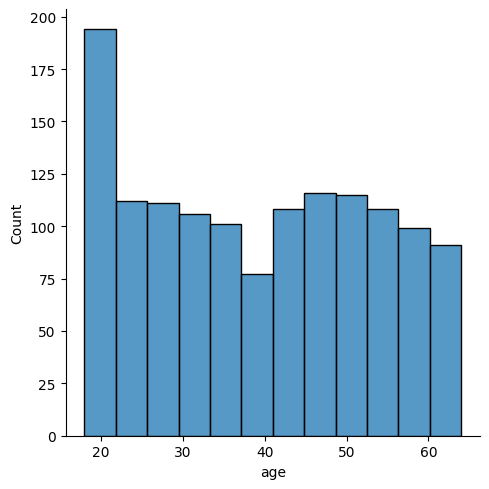

In [45]:
sns.displot(data, x='age')
#Cela ne ressemble pas à une distribution normale , mais pourrait être laissé telle qu'elle car semble relativement uniforme .Nous allons quand même la normaliser via transformation logarithmique


In [46]:
# df_log = df[['column1', 'column2']].apply(np.log)
#Voila comment appliqué la transformation logarithmique à plusieurs colonnes
data_log = data[['age']].apply(np.log)
data_log

,age
0,2.944439
1,2.890372
2,3.332205
3,3.496508
4,3.465736
...,...
1333,3.912023
1334,2.890372
1335,2.890372
1336,3.044522


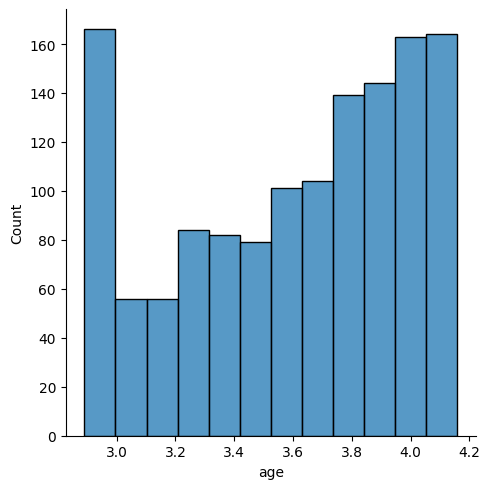

In [47]:
sns.displot(data_log, x='age')
#Le test n'est pas pertinent car la distiribution semblait uniforme mais est maintenant plus asymétrique.

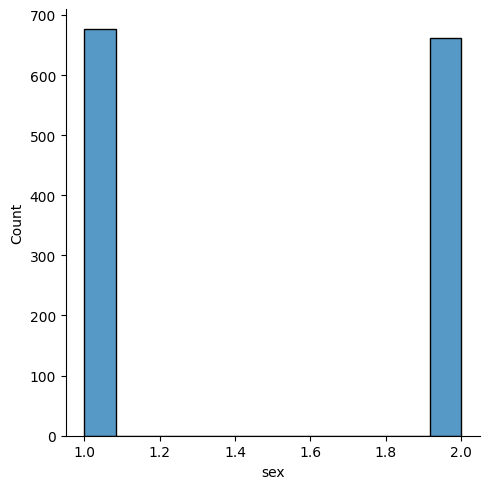

In [48]:
sns.displot(data, x='sex')

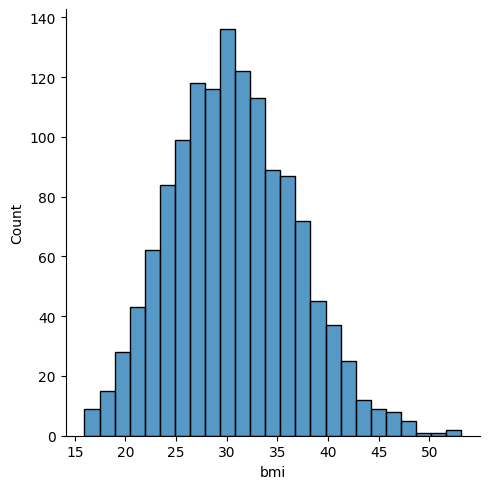

In [49]:
sns.displot(data, x='bmi')

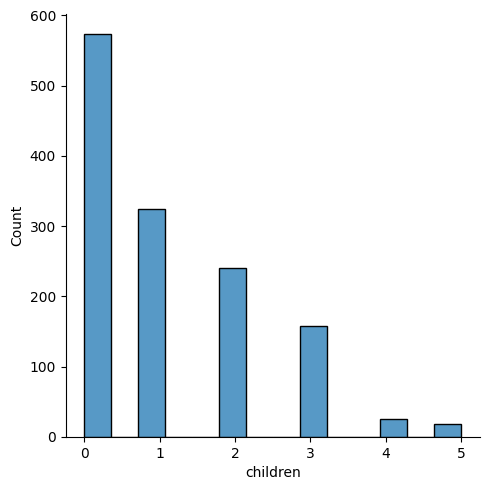

In [50]:
sns.displot(data, x='children')
#ce sont des catégories , nous n'appliquerons pas de transformation

In [51]:
#Exemple cela ne marche pas avec les catégories
data_children_log=data[['children']].apply(np.log)
data_children_log

,children
0,-inf
1,0.000000
2,1.098612
3,-inf
4,-inf
...,...
1333,1.098612
1334,-inf
1335,-inf
1336,-inf


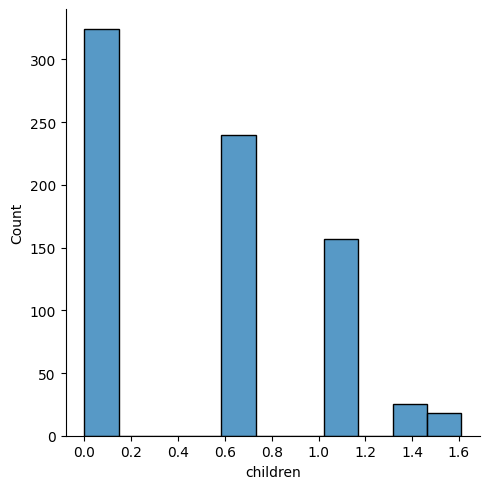

In [52]:
sns.displot(data_children_log, x='children')

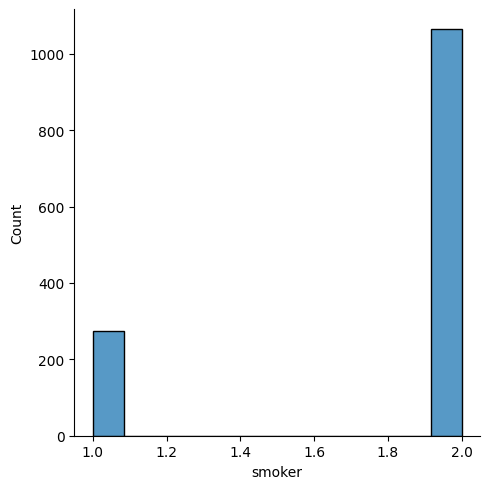

In [53]:
sns.displot(data, x='smoker')

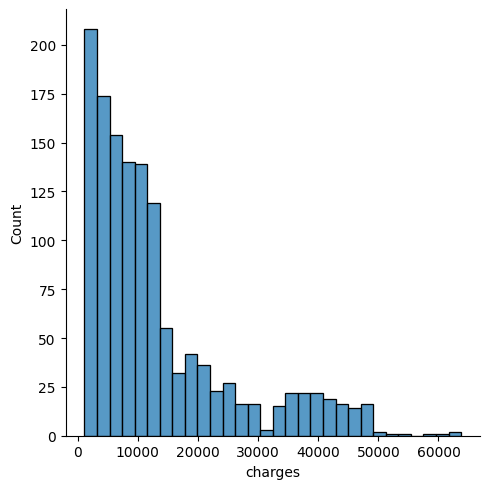

In [54]:
sns.displot(data, x='charges')
#Ici il semble que la transformation logarithmique peut être utile car il y a de nombreux outliers/valeurs extrêmes 

In [55]:
data_log_charge = data[['charges']].apply(np.log)
data_log_charge

,charges
0,9.734176
1,7.453302
2,8.400538
3,9.998092
4,8.260197
...,...
1333,9.268661
1334,7.698927
1335,7.396233
1336,7.604867


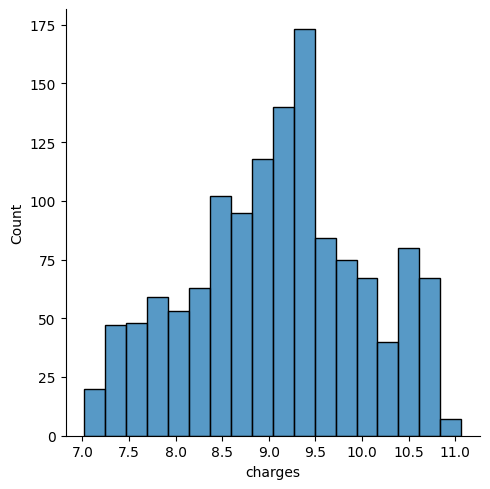

In [56]:
sns.displot(data_log_charge, x='charges')
#Ici la transformation semble nous rendre une distribution normale, ce qui serait plus facile à manipuler

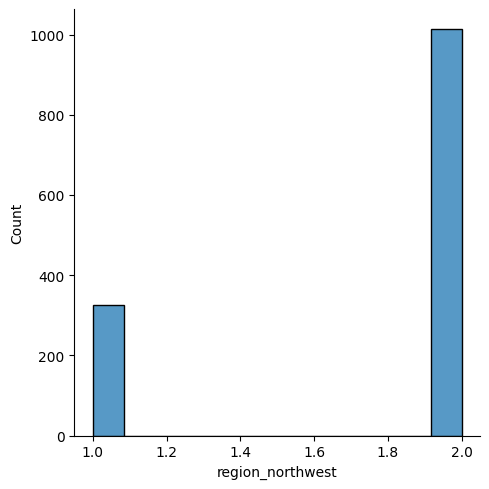

In [57]:
sns.displot(data, x='region_northwest')

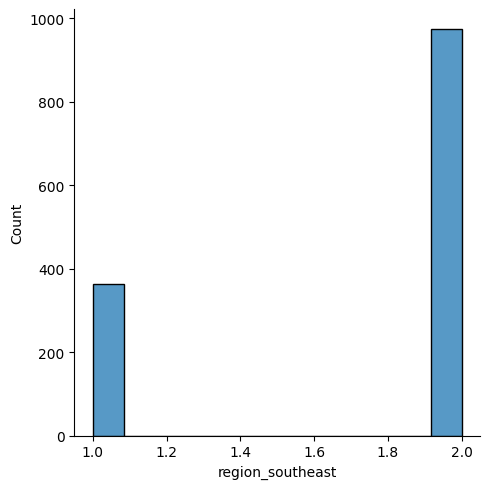

In [58]:
sns.displot(data, x='region_southeast')

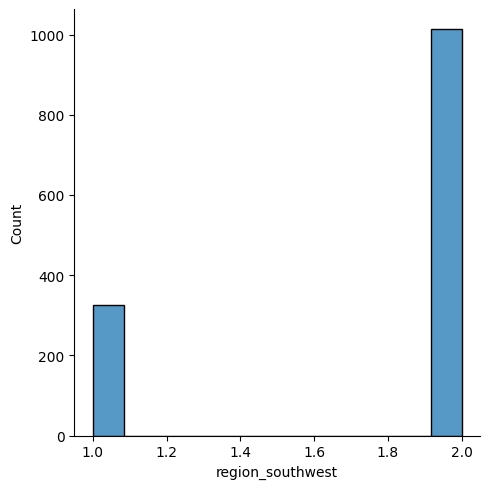

In [59]:
sns.displot(data, x='region_southwest')


Etude de la corrélation

In [60]:
data.dtypes

age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

<AxesSubplot: >

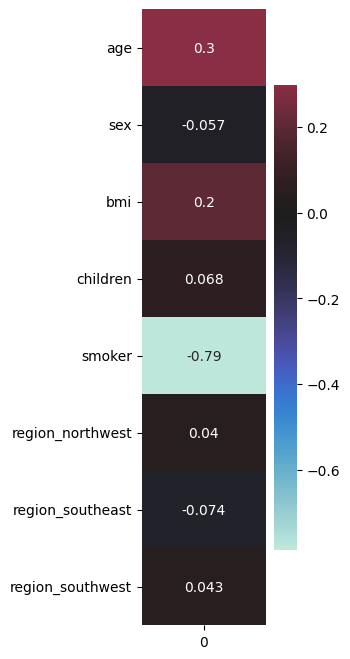

In [61]:
corr = data.corr()
corr_to_charges = data.drop('charges', axis=1).corrwith(data['charges'])
fig, ax = plt.subplots()
fig.set_size_inches(2,8)

sns.heatmap(pd.DataFrame(corr_to_charges), center=0, ax=ax, annot=True)

In [62]:
#Interprétation des test du chi 2
# if p < 0.05:
#     print('Les différences observées sont significatives (p = {:.3f}).'.format(p))
# else:
#     print('Les différences observées ne sont pas significatives (p = {:.3f}).'.format(p))

In [63]:
# Pour standardiser un dataframe 
# import pandas as pd

# # Création d'un exemple de dataframe
# df = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [1, 2, 3, 4, 5], 'C': [1, 2, 3, 4, 5]})

# # Fonction pour standardiser chaque valeur du dataframe
# def standardize(x):
#   return (x - x.mean()) / x.std()

# # Standardisation du dataframe
# df_std = df.apply(standardize)

# print(df_std)

In [64]:
#L'age est une variable quantitative ,ce qui veut dire que nous allons faire soit des test de correlations ou des t-tests
#Nous allons d'abord faire la correlation entre variable quantitative
#Nous allons faire la correlation entre l'age et la bmi
correlation_age_bmi = data['age'].corr(data['bmi'])
print("correlation age et bmi:",correlation_age_bmi)
#Nous allons faire la correlation entre l'age et les charges
correlation_age_charge = data['age'].corr(data['charges'])
print("correlation age et charges:",correlation_age_charge)

#Maintenant nous allons faire la correlation entre age une variable quantitative et les variable qualitative (catégorie) ici nous allons faire un t-test
# t-test entre age et enfant
t_age_enfant, p_age_enfant = st.ttest_ind(data["age"], data['children'])

# On affiche la t-value et la p-value
print("T-test entre age et enfant")
print("t-value:", t_age_enfant)
print("p-value:", p_age_enfant)

# t-test entre age et sex
t_age_sex, p_age_sex = st.pointbiserialr(data["age"], data['sex'])

# On affiche la t-value et la p-value
print("pointbiserialr test entre age et sex")
print("t-value:", t_age_sex)
print("p-value:", p_age_sex)


#t-test entre age et fumeur
t_age_fumeur, p_age_fumeur = st.pointbiserialr(data["age"], data['smoker'])

# On affiche la t-value et la p-value
print("pointbiserialr entre age et fumeur")
print("t-value:", t_age_fumeur)
print("p-value:", p_age_fumeur)


#t-test entre age et fumeur
t_age_region_northwest, p_age_region_northwest = st.ttest_ind(data["age"], data['region_northwest'])

# On affiche la t-value et la p-value
print("T-test entre age et region nord ouest")
print("t-value:", t_age_region_northwest)
print("p-value:", p_age_region_northwest)


#t-test entre age et fumeur
t_age_region_southeast, p_age_region_southeast = st.ttest_ind(data["age"], data['region_southeast'])

# On affiche la t-value et la p-value
print("T-test entre age et region sud est")
print("t-value:", t_age_region_southeast)
print("p-value:", p_age_region_southeast)


#t-test entre age et fumeur
t_age_region_southwest, p_age_region_southwest = st.ttest_ind(data["age"], data['region_southwest'])

# On affiche la t-value et la p-value
print("T-test entre age et sud ouest")
print("t-value:", t_age_region_southwest)
print("p-value:", p_age_region_southwest)




correlation age et bmi: 0.1092718815485352
correlation age et charges: 0.29900819333064754
T-test entre age et enfant
t-value: 98.8605910663168
p-value: 0.0
pointbiserialr test entre age et sex
t-value: 0.020855872182863357
p-value: 0.44591068123578387
pointbiserialr entre age et fumeur
t-value: 0.02501875153628508
p-value: 0.36048529037855864
T-test entre age et region nord ouest
t-value: 97.45442439640905
p-value: 0.0
T-test entre age et region sud est
t-value: 97.52678318077182
p-value: 0.0
T-test entre age et sud ouest
t-value: 97.45442439640905
p-value: 0.0


In [65]:
#La bmi est une variable quantitative ,ce qui veut dire que nous allons faire soit des test de correlations ou des t-tests
#Nous allons d'abord faire la correlation entre variable quantitative
#Nous allons faire la correlation entre l'age et la bmi
correlation_bmi_age = data['bmi'].corr(data['age'])
print("correlation bmi et age:",correlation_age_bmi)
#Nous allons faire la correlation entre l'age et les charges
correlation_bmi_charge = data['bmi'].corr(data['charges'])
print("correlation bmi et charge:",correlation_bmi_charge)

#Maintenant nous allons faire la correlation entre age une variable quantitative et les variable qualitative (catégorie) ici nous allons faire un t-test
# t-test entre bmi et enfant
t_bmi_enfant, p_bmi_enfant = st.ttest_ind(data["bmi"], data['children'])

# On affiche la t-value et la p-value
print("T-test entre bmi et enfant")
print("t-value:", t_bmi_enfant)
print("p-value:", p_bmi_enfant)

# t-test entre bmi et sex
t_bmi_sex, p_bmi_sex = st.pointbiserialr(data["bmi"], data['sex'])

# On affiche la t-value et la p-value
print("pointbiserialr entre bmi et sex")
print("t-value:", t_bmi_sex)
print("p-value:", p_bmi_sex)


#t-test entre bmi et fumeur
t_bmi_fumeur, p_bmi_fumeur = st.pointbiserialr(data["bmi"], data['smoker'])

# On affiche la t-value et la p-value
print("pointbiserialr entre bmi et fumeur")
print("t-value:", t_bmi_fumeur)
print("p-value:", p_bmi_fumeur)


#t-test entre bmi et fumeur
t_bmi_region_northwest, p_bmi_region_northwest = st.ttest_ind(data["bmi"], data['region_northwest'])

# On affiche la t-value et la p-value
print("T-test entre bmi et region nord ouest")
print("t-value:", t_bmi_region_northwest)
print("p-value:", p_bmi_region_northwest)


#t-test entre bmi et fumeur
t_bmi_region_southeast, p_bmi_region_southeast = st.ttest_ind(data["bmi"], data['region_southeast'])

# On affiche la t-value et la p-value
print("T-test entre bmi et region sud est")
print("t-value:", t_bmi_region_southeast)
print("p-value:", p_bmi_region_southeast)


#t-test entre bmi et fumeur
t_bmi_region_southwest, p_bmi_region_southwest = st.ttest_ind(data["bmi"], data['region_southwest'])

# On affiche la t-value et la p-value
print("T-test entre bmi et sud ouest")
print("t-value:", t_bmi_region_southwest)
print("p-value:", p_bmi_region_southwest)


correlation bmi et age: 0.1092718815485352
correlation bmi et charge: 0.19834096883362895
T-test entre bmi et enfant
t-value: 173.99321893726827
p-value: 0.0
pointbiserialr entre bmi et sex
t-value: -0.04637115064629447
p-value: 0.08997637178988738
pointbiserialr entre bmi et fumeur
t-value: -0.003750425904980366
p-value: 0.890985028001716
T-test entre bmi et region nord ouest
t-value: 172.9608471656253
p-value: 0.0
T-test entre bmi et region sud est
t-value: 173.1024892571945
p-value: 0.0
T-test entre bmi et sud ouest
t-value: 172.9608471656253
p-value: 0.0


Text(0.5, 1.0, 'Scatterplot')

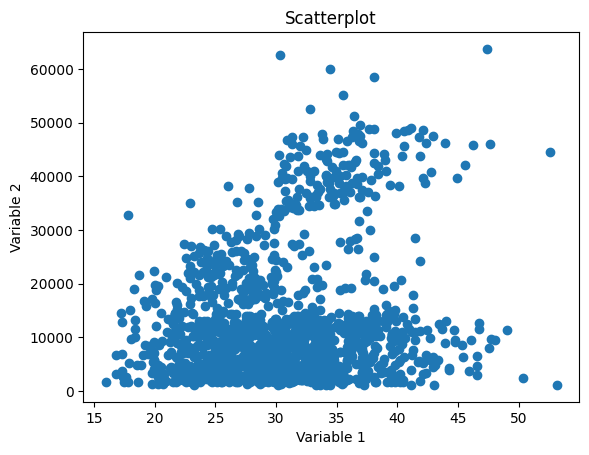

In [78]:
# Scatterplot
plt.figure()
plt.scatter(data["bmi"], data["charges"])
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Scatterplot')


<AxesSubplot: xlabel='bmi', ylabel='charges'>

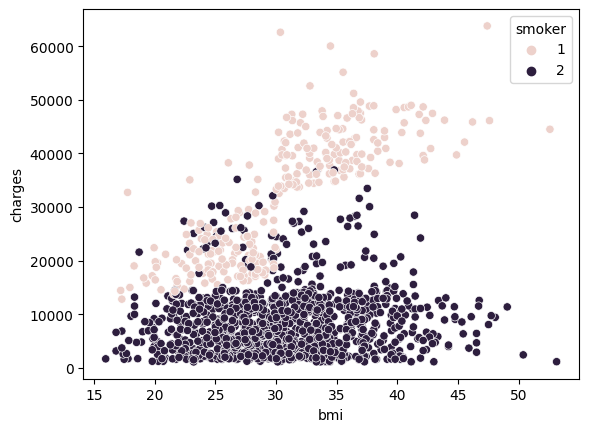

In [81]:
sns.scatterplot(x = data["bmi"], y = data["charges"],hue = data["smoker"])

In [67]:
#La charge est une variable quantitative ,ce qui veut dire que nous allons faire soit des test de correlations ou des t-tests
#Nous allons d'abord faire la correlation entre variable quantitative
#Nous allons faire la correlation entre la charge et l'age
correlation_charge_age = data['charges'].corr(data['age'])
print("correlation charge et age:",correlation_charge_age)
#Nous allons faire la correlation entre la charge et la bmi
correlation_charge_bmi = data['charges'].corr(data['bmi'])
print("correlation charge et bmi:",correlation_charge_bmi)

#Maintenant nous allons faire la correlation entre la charge une variable quantitative et les variable qualitative (catégorie) ici nous allons faire un t-test
# t-test entre age et enfant
t_charge_enfant, p_charge_enfant = st.ttest_ind(data["charges"], data['children'])

# On affiche la t-value et la p-value
print("T-test entre charge et enfant")
print("t-value:", t_charge_enfant)
print("p-value:", p_charge_enfant)

# t-test entre charge et sex
t_charge_sex, p_charge_sex = st.pointbiserialr(data["charges"], data['sex'])

# On affiche la t-value et la p-value
print("pointbiserialr entre charge et sex")
print("t-value:", t_charge_sex)
print("p-value:", p_charge_sex)


#t-test entre charge et fumeur
t_charge_fumeur, p_charge_fumeur = st.pointbiserialr(data["charges"], data['smoker'])

# On affiche la t-value et la p-value
print("pointbiserialr entre charge et fumeur")
print("t-value:", t_charge_fumeur)
print("p-value:", p_charge_fumeur)


#t-test entre charge et fumeur
t_charge_region_northwest, p_charge_region_northwest = st.ttest_ind(data["charges"], data['region_northwest'])

# On affiche la t-value et la p-value
print("T-test entre bmi et region nord ouest")
print("t-value:", t_charge_region_northwest)
print("p-value:", p_charge_region_northwest)


#t-test entre age et fumeur
t_charge_region_southeast, p_charge_region_southeast = st.ttest_ind(data["charges"], data['region_southeast'])

# On affiche la t-value et la p-value
print("T-test entre bmi et region sud est")
print("t-value:", t_charge_region_southeast)
print("p-value:", p_charge_region_southeast)


#t-test entre age et fumeur
t_charge_region_southwest, p_charge_region_southwest = st.ttest_ind(data["charges"], data['region_southwest'])

# On affiche la t-value et la p-value
print("T-test entre charge et sud ouest")
print("t-value:", t_charge_region_southwest)
print("p-value:", p_charge_region_southwest)

correlation charge et age: 0.2990081933306476
correlation charge et bmi: 0.19834096883362895
T-test entre charge et enfant
t-value: 40.08043408868691
p-value: 1.642422871191252e-275
pointbiserialr entre charge et sex
t-value: -0.05729206220202536
p-value: 0.03613272100594507
pointbiserialr entre charge et fumeur
t-value: -0.7872514304984773
p-value: 8.27143584217778e-283
T-test entre bmi et region nord ouest
t-value: 40.07843411878885
p-value: 1.7268159295586342e-275
T-test entre bmi et region sud est
t-value: 40.07852215928208
p-value: 1.7230112386342267e-275
T-test entre charge et sud ouest
t-value: 40.07843411878885
p-value: 1.7268159295586342e-275


In [68]:
#Sex/Genre est une qualitative ici une catégorie , ce qui veut dire que l'on va faire des t-test et des test de chi square
# t-test entre age et sex
t_sex_age, p_sex_age = st.pointbiserialr(data["sex"], data['age'])

# On affiche la t-value et la p-value
print("pointbiserialr entre age et sex")
print("t-value:", t_sex_age)
print("p-value:", p_sex_age)


# t-test entre bmi et sex
t_sex_bmi, p_sex_bmi = st.pointbiserialr(data["sex"], data['bmi'])

# On affiche la t-value et la p-value
print("pointbiserialr entre bmi et sex")
print("t-value:", t_sex_bmi)
print("p-value:", p_sex_bmi)

#Test du chi-deux entre genre et enfant
df_subset_1 = data.loc[:, ['sex', 'children']]


chi2_1, p_1, dof_1, expected_1 = st.chi2_contingency(df_subset_1)

# Print chi-square value and p-value
print("Test du chi-deux entre genre et enfant")
print("chi-square value:", chi2_1)
print("p-value:", p_1)


#Test du chi-deux entre genre et enfant
df_subset_2 = data.loc[:, ['sex', 'smoker']]


chi2_2, p_2, dof_2, expected_2 = st.chi2_contingency(df_subset_2)

# Print chi-square value and p-value
print("Test du chi-deux entre genre et fumeur")
print("chi-square value:", chi2_2)
print("p-value:", p_2)


# t-test entre sex et charge
t_sex_charge, p_sex_charge = st.pointbiserialr(data["sex"], data['charges'])

# On affiche la t-value et la p-value
print("pointbiserialr entre genre et charge")
print("t-value:", t_sex_charge)
print("p-value:", p_sex_charge)


#Test du chi-deux entre genre et region nord ouest
df_subset_3 = data.loc[:, ['sex', 'region_northwest']]


chi2_3, p_3, dof_3, expected_3 = st.chi2_contingency(df_subset_3)

# Print chi-square value and p-value
print("Test du chi-deux entre genre et et region nord ouest")
print("chi-square value:", chi2_3)
print("p-value:", p_3)

#Test du chi-deux entre genre et region sud est
df_subset_4 = data.loc[:, ['sex', 'region_southeast']]


chi2_4, p_4, dof_4, expected_4 = st.chi2_contingency(df_subset_4)

# Print chi-square value and p-value
print("Test du chi-deux entre genre et et region sud est")
print("chi-square value:", chi2_4)
print("p-value:", p_4)


#Test du chi-deux entre genre et region sud ouest
df_subset_5 = data.loc[:, ['sex', 'region_southeast']]


chi2_5, p_5, dof_5, expected_5 = st.chi2_contingency(df_subset_5)

# Print chi-square value and p-value
print("Test du chi-deux entre genre et et region sud est")
print("chi-square value:", chi2_5)
print("p-value:", p_5)




pointbiserialr entre age et sex
t-value: 0.020855872182863357
p-value: 0.44591068123578387
pointbiserialr entre bmi et sex
t-value: -0.04637115064629447
p-value: 0.08997637178988738
Test du chi-deux entre genre et enfant
chi-square value: 1063.637923208191
p-value: 0.9999999934109498
Test du chi-deux entre genre et fumeur
chi-square value: 175.41811171246184
p-value: 1.0
pointbiserialr entre genre et charge
t-value: -0.05729206220202536
p-value: 0.03613272100594507
Test du chi-deux entre genre et et region nord ouest
chi-square value: 199.31488065362254
p-value: 1.0
Test du chi-deux entre genre et et region sud est
chi-square value: 199.1340784313726
p-value: 1.0
Test du chi-deux entre genre et et region sud est
chi-square value: 199.1340784313726
p-value: 1.0


In [69]:
#Children est une variable qualitative ici une catégorie , ce qui veut dire que l'on va faire des t-test et des test de chi square
# t-test entre age et sex
t_children_age, p_children_age = st.ttest_ind(data["children"], data['age'])

# On affiche la t-value et la p-value
print("T-test entre le nombre d'enfant et l'age")
print("t-value:", t_children_age)
print("p-value:", p_children_age)


# t-test entre bmi et sex
t_children_bmi, p_children_bmi = st.ttest_ind(data["children"], data['bmi'])

# On affiche la t-value et la p-value
print("T-test entre le nombre d'enfant et la  bmi")
print("t-value:", t_children_bmi)
print("p-value:", p_children_bmi)

#Test du chi-deux entre genre et enfant
df_subset_1_1 = data.loc[:, ['children', 'sex']]


chi2_1_1, p_1_1, dof_1_1, expected_1_1 = st.chi2_contingency(df_subset_1_1)

# Print chi-square value and p-value
print("Test du chi-deux entre nombre d'enfant et le genre")
print("chi-square value:", chi2_1_1)
print("p-value:", p_1_1)


#Test du chi-deux entre nombre d'enfant et fumer
df_subset_2_1 = data.loc[:, ['children', 'smoker']]


chi2_2_1, p_2_1, dof_2_1, expected_2_1 = st.chi2_contingency(df_subset_2_1)

# Print chi-square value and p-value
print("Test du chi-deux entre nombre d'enfant et fumeur")
print("chi-square value:", chi2_2_1)
print("p-value:", p_2_1)


# t-test entre nombre d'enfant et charge
t_children_charge, p_children_charge = st.ttest_ind=(data["children"], data['charges'])

# On affiche la t-value et la p-value
print("T-test entre nombre d'enfants et charge")
print("t-value:", t_children_charge)
print("p-value:", p_children_charge)


#Test du chi-deux entre genre et region nord ouest
df_subset_3_1 = data.loc[:, ['children', 'region_northwest']]


chi2_3_1, p_3_1, dof_3_1, expected_3_1 = st.chi2_contingency(df_subset_3_1)

# Print chi-square value and p-value
print("Test du chi-deux entre genre et et region nord ouest")
print("chi-square value:", chi2_3_1)
print("p-value:", p_3_1)

#Test du chi-deux entre nombre d'enfant et region sud est
df_subset_4_1 = data.loc[:, ['children', 'region_southeast']]


chi2_4_1, p_4_1, dof_4_1, expected_4_1 = st.chi2_contingency(df_subset_4_1)

# Print chi-square value and p-value
print("Test du chi-deux entre nombre d'enfants et et region sud est")
print("chi-square value:", chi2_4_1)
print("p-value:", p_4_1)


#Test du chi-deux entre nombre d'enfant et region sud ouest
df_subset_5_1 = data.loc[:, ['children', 'region_southeast']]


chi2_5_1, p_5_1, dof_5_1, expected_5_1 = st.chi2_contingency(df_subset_5_1)

# Print chi-square value and p-value
print("Test du chi-deux entre nombre d'enfants et et region sud est")
print("chi-square value:", chi2_5_1)
print("p-value:", p_5_1)



T-test entre le nombre d'enfant et l'age
t-value: -98.8605910663168
p-value: 0.0
T-test entre le nombre d'enfant et la  bmi
t-value: -173.99321893726827
p-value: 0.0
Test du chi-deux entre nombre d'enfant et le genre
chi-square value: 1063.637923208191
p-value: 0.9999999934109498
Test du chi-deux entre nombre d'enfant et fumeur
chi-square value: 1082.7182334341892
p-value: 0.999999926373241
T-test entre nombre d'enfants et charge
t-value: 0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64
p-value: 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64
Test du chi-deux entre genre et et region nord ouest
chi-square value: 1090.6040109906862
p-value: 0.9999998119337723
Test du chi-d

In [70]:
data.dtypes

age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [71]:
#Smoker est une variable qualitative ici une catégorie , ce qui veut dire que l'on va faire des t-test et des test de chi square
# t-test entre age et sex
t_smoker_age, p_smoker_age = st.pointbiserialr(data["smoker"], data['age'])

# On affiche la t-value et la p-value
print("pointbiserialr entre les fumeur et l'age")
print("t-value:", t_smoker_age)
print("p-value:", p_smoker_age)


# t-test entre bmi et sex
t_smoker_bmi, p_smoker_bmi = st.pointbiserialr(data["smoker"], data['bmi'])

# On affiche la t-value et la p-value
print("pointbiserialr entre le nombre d'enfant et la  bmi")
print("t-value:", t_children_bmi)
print("p-value:", p_children_bmi)

#Test du chi-deux entre genre et enfant
df_subset_1_2 = data.loc[:, ['children', 'sex']]


chi2_1_2, p_1_2, dof_1_2, expected_1_2 = st.chi2_contingency(df_subset_1_2)

# Print chi-square value and p-value
print("Test du chi-deux entre nombre d'enfant et le genre")
print("chi-square value:", chi2_1_2)
print("p-value:", p_1_2)


#Test du chi-deux entre nombre d'enfant et fumer
df_subset_2_2 = data.loc[:, ['smoker','children']]


chi2_2_2, p_2_2, dof_2_2, expected_2_2 = st.chi2_contingency(df_subset_2_2)

# Print chi-square value and p-value
print("Test du chi-deux entre fumeur et nombre d'enfant")
print("chi-square value:", chi2_2_2)
print("p-value:", p_2_2)


# t-test entre nombre d'enfant et charge
t_smoker_charge, p_smoker_charge = st.pointbiserialr(data["smoker"], data['charges'])

# On affiche la t-value et la p-value
print("pointbiserialr entre nombre d'enfants et charge")
print("t-value:", t_smoker_charge)
print("p-value:", p_smoker_charge)


#Test du chi-deux entre genre et region nord ouest
df_subset_3_2 = data.loc[:, ['smoker', 'region_northwest']]


chi2_3_2, p_3_2, dof_3_2, expected_3_2 = st.chi2_contingency(df_subset_3_2)

# Print chi-square value and p-value
print("Test du chi-deux entre genre et et region nord ouest")
print("chi-square value:", chi2_3_2)
print("p-value:", p_3_2)

#Test du chi-deux entre nombre d'enfant et region sud est
df_subset_4_2 = data.loc[:, ['smoker', 'region_southeast']]


chi2_4_2, p_4_2, dof_4_2, expected_4_2 = st.chi2_contingency(df_subset_4_2)

# Print chi-square value and p-value
print("Test du chi-deux entre nombre d'enfants et et region sud est")
print("chi-square value:", chi2_4_2)
print("p-value:", p_4_2)


#Test du chi-deux entre nombre d'enfant et region sud ouest
df_subset_5_2 = data.loc[:, ['smoker', 'region_southeast']]


chi2_5_2, p_5_2, dof_5_2, expected_5_2 = st.chi2_contingency(df_subset_5_2)

# Print chi-square value and p-value
print("Test du chi-deux entre nombre d'enfants et et region sud est")
print("chi-square value:", chi2_5_2)
print("p-value:", p_5_2)

pointbiserialr entre les fumeur et l'age
t-value: 0.02501875153628508
p-value: 0.36048529037855864
pointbiserialr entre le nombre d'enfant et la  bmi
t-value: -173.99321893726827
p-value: 0.0
Test du chi-deux entre nombre d'enfant et le genre
chi-square value: 1063.637923208191
p-value: 0.9999999934109498
Test du chi-deux entre fumeur et nombre d'enfant
chi-square value: 1082.7182334341892
p-value: 0.999999926373241
pointbiserialr entre nombre d'enfants et charge
t-value: -0.7872514304984773
p-value: 8.27143584217778e-283
Test du chi-deux entre genre et et region nord ouest
chi-square value: 160.47124241779233
p-value: 1.0
Test du chi-deux entre nombre d'enfants et et region sud est
chi-square value: 150.33651275321316
p-value: 1.0
Test du chi-deux entre nombre d'enfants et et region sud est
chi-square value: 150.33651275321316
p-value: 1.0


In [72]:
#Les region sont des variables qualitative ici une catégorie , ce qui veut dire que l'on va faire des t-test et des test de chi square
# t-test entre region et sex
t_region_northwest_age, p_region_northwest_age = st.pointbiserialr(data["region_northwest"], data['age'])

# On affiche la t-value et la p-value
print("pointbiserialr entre les habitants de la region nord ouest et l'age")
print("t-value:", t_region_northwest_age)
print("p-value:", p_region_northwest_age)


# t-test entre region_northwest et sex
t_region_northwest_bmi, p_region_northwest_bmi = st.pointbiserialr(data["region_northwest"], data['bmi'])

# On affiche la t-value et la p-value
print("pointbiserialr entre le nombre d'enfant et la  bmi")
print("t-value:", t_region_northwest_bmi)
print("p-value:", p_region_northwest_bmi)

#Test du chi-deux entre region_northwest et enfant
df_subset_1_3 = data.loc[:, ['region_northwest', 'sex']]


chi2_1_3, p_1_3, dof_1_3, expected_1_3 = st.chi2_contingency(df_subset_1_3)

# Print chi-square value and p-value
print("Test du chi-deux entre region_northwest et le genre")
print("chi-square value:", chi2_1_3)
print("p-value:", p_1_3)


#Test du chi-deux entre nombre d'enfant et fumer
df_subset_2_3 = data.loc[:, ['region_northwest','children']]


chi2_2_3, p_2_3, dof_2_3, expected_2_3 = st.chi2_contingency(df_subset_2_3)

# Print chi-square value and p-value
print("Test du chi-deux entre region_northwest et nombre d'enfant")
print("chi-square value:", chi2_2_3)
print("p-value:", p_2_3)


# t-test entre region_northwest et charge
t_region_northwest_charge, p_region_northwest_charge = st.pointbiserialr(data["region_northwest"], data['charges'])

# On affiche la t-value et la p-value
print("pointbiserialr entre nombre d'enfants et charge")
print("t-value:", t_region_northwest_charge)
print("p-value:", p_region_northwest_charge)


#Test du chi-deux entre region_northwest et region nord ouest
df_subset_3_3 = data.loc[:, ['region_northwest', 'smoker']]


chi2_3_3, p_3_3, dof_3_3, expected_3_3 = st.chi2_contingency(df_subset_3_3)

# Print chi-square value and p-value
print("Test du chi-deux entre region_northwest et les fumer")
print("chi-square value:", chi2_3_3)
print("p-value:", p_3_3)

#Test du chi-deux entre region_northwest et region sud est
df_subset_4_3 = data.loc[:, ['region_northwest', 'region_southeast']]


chi2_4_3, p_4_3, dof_4_3, expected_4_3 = st.chi2_contingency(df_subset_4_3)

# Print chi-square value and p-value
print("Test du chi-deux entre region_northwest et et region sud est")
print("chi-square value:", chi2_4_3)
print("p-value:", p_4_3)


#Test du chi-deux entre nombre d'enfant et region sud ouest
df_subset_5_3 = data.loc[:, ['region_northwest', 'region_southeast']]


chi2_5_3, p_5_3, dof_5_3, expected_5_3 = st.chi2_contingency(df_subset_5_3)

# Print chi-square value and p-value
print("Test du chi-deux entre region_northwest et region sud est")
print("chi-square value:", chi2_5_3)
print("p-value:", p_5_3)

pointbiserialr entre les habitants de la region nord ouest et l'age
t-value: 0.000407423373278495
p-value: 0.9881206703187126
pointbiserialr entre le nombre d'enfant et la  bmi
t-value: 0.1359955237113306
p-value: 5.941730745524137e-07
Test du chi-deux entre region_northwest et le genre
chi-square value: 199.31488065362254
p-value: 1.0
Test du chi-deux entre region_northwest et nombre d'enfant
chi-square value: 1090.6040109906862
p-value: 0.9999998119337723
pointbiserialr entre nombre d'enfants et charge
t-value: 0.039904864040437985
p-value: 0.14459698799369963
Test du chi-deux entre region_northwest et les fumer
chi-square value: 160.47124241779233
p-value: 1.0
Test du chi-deux entre region_northwest et et region sud est
chi-square value: 229.35652569006683
p-value: 1.0
Test du chi-deux entre region_northwest et region sud est
chi-square value: 229.35652569006683
p-value: 1.0


In [73]:
#Les region sont des variables qualitative ici une catégorie , ce qui veut dire que l'on va faire des t-test et des test de chi square
# t-test entre region_southeast et sex
t_region_southeast_age, p_region_southeast_age = st.pointbiserialr(data["region_southeast"], data['age'])

# On affiche la t-value et la p-value
print("pointbiserialr entreregion_southeast et l'age")
print("t-value:", t_region_southeast_age)
print("p-value:", p_region_southeast_age)


# t-test entre region_northwest et sex
t_region_southeast_bmi, p_region_southeast_bmi = st.pointbiserialr(data["region_southeast"], data['bmi'])

# On affiche la t-value et la p-value
print("pointbiserialr entre region_southeast  la  bmi")
print("t-value:", t_region_southeast_bmi)
print("p-value:", p_region_southeast_bmi)

#Test du chi-deux entre region_southeast et enfant
df_subset_1_4 = data.loc[:, ['region_southeast', 'sex']]


chi2_1_4, p_1_4, dof_1_4, expected_1_4 = st.chi2_contingency(df_subset_1_4)

# Print chi-square value and p-value
print("Test du chi-deux entre region_southeast et le genre")
print("chi-square value:", chi2_1_4)
print("p-value:", p_1_4)


#Test du chi-deux entre nombre d'enfant et fumer
df_subset_2_4 = data.loc[:, ['region_southeast','children']]


chi2_2_4, p_2_4, dof_2_4, expected_2_4 = st.chi2_contingency(df_subset_2_4)

# Print chi-square value and p-value
print("Test du chi-deux entre region_southeast et nombre d'enfant")
print("chi-square value:", chi2_2_4)
print("p-value:", p_2_4)


# t-test entre region_northwest et charge
t_region_southeast_charge, p_region_southeast_charge = st.pointbiserialr(data["region_southeast"], data['charges'])

# On affiche la t-value et la p-value
print("pointbiserialr entre nombre d'enfants et charge")
print("t-value:", t_region_southeast_charge)
print("p-value:", p_region_southeast_charge)


#Test du chi-deux entre region_northwest et region nord ouest
df_subset_3_4 = data.loc[:, ['region_southeast', 'smoker']]


chi2_3_4, p_3_4, dof_3_4, expected_3_4 = st.chi2_contingency(df_subset_3_4)

# Print chi-square value and p-value
print("Test du chi-deux entre region_southeast et les fumeurs")
print("chi-square value:", chi2_3_4)
print("p-value:", p_3_4)

#Test du chi-deux entre region_northwest et region sud est
df_subset_4_4 = data.loc[:, [ 'region_southeast','region_northwest']]


chi2_4_4, p_4_4, dof_4_4, expected_4_4 = st.chi2_contingency(df_subset_4_4)

# Print chi-square value and p-value
print("Test du chi-deux entre region_northwest et et region sud est")
print("chi-square value:", chi2_4_4)
print("p-value:", p_4_4)


#Test du chi-deux entre region_southeastet region sud ouest
df_subset_5_4 = data.loc[:, ['region_southeast', 'region_southwest']]


chi2_5_4, p_5_4, dof_5_4, expected_5_4 = st.chi2_contingency(df_subset_5_4)

# Print chi-square value and p-value
print("Test du chi-deux entre region_southeast et region sud ouest")
print("chi-square value:", chi2_5_4)
print("p-value:", p_5_4)

pointbiserialr entreregion_southeast et l'age
t-value: 0.011641940617229146
p-value: 0.6704990026067668
pointbiserialr entre region_southeast  la  bmi
t-value: -0.27002464902846685
p-value: 8.707820869271749e-24
Test du chi-deux entre region_southeast et le genre
chi-square value: 199.1340784313726
p-value: 1.0
Test du chi-deux entre region_southeast et nombre d'enfant
chi-square value: 1066.1703737036873
p-value: 0.9999999908135851
pointbiserialr entre nombre d'enfants et charge
t-value: -0.07398155156575978
p-value: 0.006782698910660704
Test du chi-deux entre region_southeast et les fumeurs
chi-square value: 150.33651275321316
p-value: 1.0
Test du chi-deux entre region_northwest et et region sud est
chi-square value: 229.35652569006683
p-value: 1.0
Test du chi-deux entre region_southeast et region sud ouest
chi-square value: 229.35652569006683
p-value: 1.0


In [74]:
#Les region sont des variables qualitative ici une catégorie , ce qui veut dire que l'on va faire des t-test et des test de chi square
# t-test entre region_southwest et sex
t_region_southwest_age, p_region_southwest_age = st.pointbiserialr(data["region_southwest"], data['age'])

# On affiche la t-value et la p-value
print("pointbiserialr entre region_southwest et l'age")
print("t-value:", t_region_southwest_age)
print("p-value:", p_region_southwest_age)


# t-test entre region_northwest et sex
t_region_southwest_bmi, p_region_southwest_bmi = st.pointbiserialr(data["region_southwest"], data['bmi'])

# On affiche la t-value et la p-value
print("pointbiserialr entre region_southwest  la  bmi")
print("t-value:", t_region_southwest_bmi)
print("p-value:", p_region_southwest_bmi)

#Test du chi-deux entre region_southeast et enfant
df_subset_1_5 = data.loc[:, ['region_southwest', 'sex']]


chi2_1_5, p_1_5, dof_1_5, expected_1_5 = st.chi2_contingency(df_subset_1_5)

# Print chi-square value and p-value
print("Test du chi-deux entre region_southwest et le genre")
print("chi-square value:", chi2_1_5)
print("p-value:", p_1_5)


#Test du chi-deux entre nombre d'enfant et fumer
df_subset_2_5 = data.loc[:, ['region_southwest','children']]


chi2_2_5, p_2_5, dof_2_5, expected_2_5 = st.chi2_contingency(df_subset_2_5)

# Print chi-square value and p-value
print("Test du chi-deux entre region_southwest et nombre d'enfant")
print("chi-square value:", chi2_2_5)
print("p-value:", p_2_5)


# t-test entre region_southwest et charge
t_region_southwest_charge, p_region_southwest_charge = st.pointbiserialr(data["region_southwest"], data['charges'])

# On affiche la t-value et la p-value
print("pointbiserialr entre nombre d'enfants et charge")
print("t-value:", t_region_southwest_charge)
print("p-value:", p_region_southwest_charge)


#Test du chi-deux entre region_southwest et les fumeurs
df_subset_3_5 = data.loc[:, ['region_southwest', 'smoker']]


chi2_3_5, p_3_5, dof_3_5, expected_3_5 = st.chi2_contingency(df_subset_3_5)

# Print chi-square value and p-value
print("Test du chi-deux entre region_southwest et les fumeurs")
print("chi-square value:", chi2_3_5)
print("p-value:", p_3_5)

#Test du chi-deux entre region_northwest et region_southwest
df_subset_4_5 = data.loc[:, [ 'region_southwest','region_northwest']]


chi2_4_5, p_4_5, dof_4_5, expected_4_5 = st.chi2_contingency(df_subset_4_5)

# Print chi-square value and p-value
print("Test du chi-deux entre region_southwest et et region sud est")
print("chi-square value:", chi2_4_5)
print("p-value:", p_4_5)


#Test du chi-deux entre region_southeastet region sud ouest
df_subset_5_5 = data.loc[:, ['region_southeast', 'region_southwest']]


chi2_5_5, p_5_5, dof_5_5, expected_5_5 = st.chi2_contingency(df_subset_5_5)

# Print chi-square value and p-value
print("Test du chi-deux entre region_southeast et region sud ouest")
print("chi-square value:", chi2_5_5)
print("p-value:", p_5_5)

pointbiserialr entre region_southwest et l'age
t-value: -0.010016234211405505
p-value: 0.7143297063362863
pointbiserialr entre region_southwest  la  bmi
t-value: 0.006205183019343327
p-value: 0.8206045668960489
Test du chi-deux entre region_southwest et le genre
chi-square value: 197.97281337728623
p-value: 1.0
Test du chi-deux entre region_southwest et nombre d'enfant
chi-square value: 1083.4870169586643
p-value: 0.9999999192022109
pointbiserialr entre nombre d'enfants et charge
t-value: 0.043210028991684725
p-value: 0.11414659361888743
Test du chi-deux entre region_southwest et les fumeurs
chi-square value: 160.47124241779233
p-value: 1.0
Test du chi-deux entre region_southwest et et region sud est
chi-square value: 216.66666666666663
p-value: 1.0
Test du chi-deux entre region_southeast et region sud ouest
chi-square value: 229.35652569006683
p-value: 1.0


In [75]:
data.columns.to_list()

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'charges',
 'region_northwest',
 'region_southeast',
 'region_southwest']

<AxesSubplot: title={'center': "Diagramme en boîte des charges en fonction de l'âge"}, xlabel='age', ylabel='charges'>

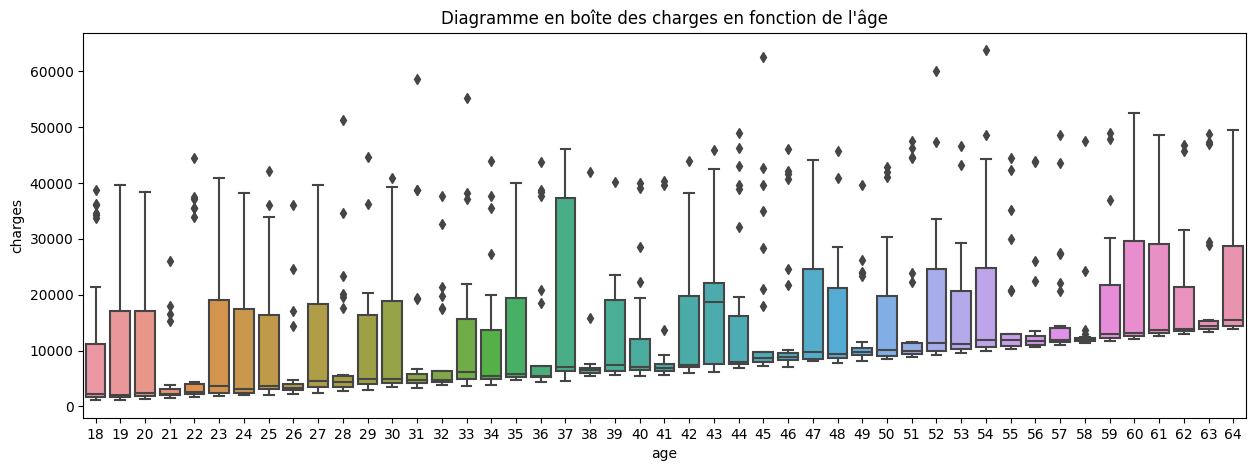

In [76]:
plt.figure(figsize=(15,5))

plt.title("Diagramme en boîte des charges en fonction de l'âge")

sns.boxplot(x='age', y='charges', data=data)

<AxesSubplot: xlabel='sex', ylabel='smoker'>

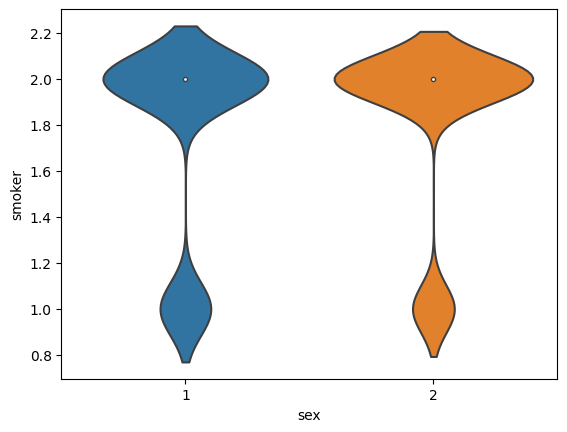

In [77]:
sns.violinplot(x='sex', y='smoker', data=data)
